에러 확인

In [43]:
'''
다 함께 하는 작업 공간이기 때문에 경로나 파일 명 등을 통일 해야 할 것 같습니다.
그렇게 하지 않으면 경로 때문에 매번 새로운 커밋이 생성 됩니다.
'''

import os

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)

# 필요한 CSV 파일이 있는 디렉토리로 변경
target_directory = "C:/k-project/raw_datasets/회귀" # 해당 코드 부분의 경로를 동일하게 하거나 / 깃 리파지토리 안에 파일을 집어 넣는 작업 필요.      
os.chdir(target_directory)

import pandas as pd

# CSV 파일 불러오기
csv_filename = "국가별_총에너지_발전량(1980-2021)_회귀_시각화_전처리 (1).csv"  # CSV 파일명. 파일명을 모두 동일하게 해야합니다.
df = pd.read_csv(csv_filename)

# 데이터 확인
print(df.head())

# 한글 깨짐 방지 
plt.rcParams['font.family'] = 'NanumGothic' 


Current directory: C:\k-project\raw_datasets\회귀
   Unnamed: 0 COUNTRY                      GENERATION  Year        Value
0           0   World        Generation (billion kWh)  1980  8017.590351
1           1   World           Nuclear (billion kWh)  1980   684.380219
2           2   World      Fossil fuels (billion kWh)  1980  5588.874065
3           3   World        Renewables (billion kWh)  1980  1754.115066
4           4   World  Hydroelectricity (billion kWh)  1980   1722.56809


In [44]:
pd.set_option('display.max_rows', None)  # 최대 행 수를 None으로 설정
pd.set_option('display.max_columns', None)  # 최대 열 수를 None으로 설정

In [45]:
pd.set_option('display.max_rows', 15)  # 최대 행 수를 None으로 설정
pd.set_option('display.max_columns', 15)  # 최대 열 수를 None으로 설정

### 국가별 에너지 발전량

COLUMN NAME 설명  
COUNTRY : 국가명  
CONSUMPTION : 발전 방식  
YEAR : 년도  
VALUE : 에너지 발전량  

In [46]:
df.head()

,Unnamed: 0,COUNTRY,GENERATION,Year,Value
0,0,World,Generation (billion kWh),1980,8017.590351
1,1,World,Nuclear (billion kWh),1980,684.380219
2,2,World,Fossil fuels (billion kWh),1980,5588.874065
3,3,World,Renewables (billion kWh),1980,1754.115066
4,4,World,Hydroelectricity (billion kWh),1980,1722.56809


In [47]:
df.info()
# 전체 행은 125580개, Value에서 결측값이 있는 것으로 추정됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125580 entries, 0 to 125579
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  125580 non-null  int64 
 1   COUNTRY     125580 non-null  object
 2   GENERATION  125580 non-null  object
 3   Year        125580 non-null  int64 
 4   Value       123363 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.8+ MB


In [48]:
df.head()
# 앗 첫번째 열에 인덱스가 포함되어 데이터 프레임이 불러와졌다! 제거하자

,Unnamed: 0,COUNTRY,GENERATION,Year,Value
0,0,World,Generation (billion kWh),1980,8017.590351
1,1,World,Nuclear (billion kWh),1980,684.380219
2,2,World,Fossil fuels (billion kWh),1980,5588.874065
3,3,World,Renewables (billion kWh),1980,1754.115066
4,4,World,Hydroelectricity (billion kWh),1980,1722.56809


In [49]:
df.tail()

,Unnamed: 0,COUNTRY,GENERATION,Year,Value
125575,125575,Zimbabwe,Tide and wave (billion kWh),2021,0
125576,125576,Zimbabwe,Solar (billion kWh),2021,0.04148
125577,125577,Zimbabwe,Wind (billion kWh),2021,0
125578,125578,Zimbabwe,Biomass and waste (billion kWh),2021,0.099788966
125579,125579,Zimbabwe,Hydroelectric pumped storage (billion kWh),2021,0


In [50]:
# 필요 없는 열 제거
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [51]:
df.describe()

,Year
count,125580.000000
mean,2000.500000
std,12.120967
min,1980.000000
25%,1990.000000
50%,2000.500000
75%,2011.000000
max,2021.000000


In [52]:
# 결측값의 개수 확인
df["Value"].isnull().sum()

2217

In [53]:
# Value 데이터 확인
df["Value"].value_counts()

0              64738
--              8226
0.001            930
0.002            786
0.003            522
               ...  
20.69222           1
16.04              1
39.52822           1
11.894             1
0.099788966        1
Name: Value, Length: 23325, dtype: int64

In [54]:
# 각 행이 숫자형인지 판별하는 함수 정의
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# 각 행이 문자형인지 판별하는 함수 정의
def is_string(s):
    if isinstance(s, str):
        # 이미 숫자로 변환 가능한 경우는 제외한다.
        return not is_number(s)
    else:
        return False

# 각 행이 결측값인지 판별하는 함수 정의
def is_nan(s):
    return pd.isnull(s)

# 각각의 조건에 따라 boolean mask 생성 후 sum()을 이용해 개수 계산 
num_count = df['Value'].apply(is_number).sum()
str_count = df['Value'].apply(is_string).sum()
nan_count = df['Value'].apply(is_nan).sum()


print(f"Number Count: {num_count}")
print(f"String Count: {str_count}")
print(f"NaN Count: {nan_count}")

Number Count: 116987
String Count: 8593
NaN Count: 2217


In [55]:
# 문자열로 구성된 Value의 값, 범주 및 개수 확인
str_df = df[df['Value'].apply(is_string)]

print(str_df['Value'].value_counts())

--    8226
ie     367
Name: Value, dtype: int64


ie 값 발생한 국가  
French Guiana 프랑스령 기아나/ 프랑스 지방   
Guadeloupe 과들루프/ 프랑스의 데파르트망  
Martinique 마르티니크/ 프랑스의 데파르트망  
Reunion  레위니옹/ 프랑스의 해외영토  
Northern Mariana Islands 북마리아나 제도/ 미국 영토

In [56]:
Value_ie = df[(df['COUNTRY'] == "Franch Guiana") | (df['COUNTRY'] == "Northern Mariana Islands") | (df['COUNTRY'] == "Guadeloupe") | (df['COUNTRY'] == "Martinique") | (df['COUNTRY'] == "Reunion")]

In [57]:
# 데이터를 COUNTRY, Year, GENERATION으로 그룹화하고 Value의 합계를 계산합니다.
Value_id_data = Value_ie.groupby(['COUNTRY','GENERATION'])['Value'].sum().reset_index()

# Value가 ie가 아닌 행만 선택합니다.
filtered_ie_data = Value_id_data[Value_id_data['Value'] != 'ie']

filtered_ie_data


,COUNTRY,GENERATION,Value
0,Guadeloupe,Biomass and waste (billion kWh),000000000000000000000.0760.0580.0680.0640.0840...
1,Guadeloupe,Fossil fuels (billion kWh),0.290.3230.370.3840.4320.4620.5130.5850.640.59...
2,Guadeloupe,Generation (billion kWh),0.290.3230.370.3840.4320.4620.5430.6150.670.62...
3,Guadeloupe,Geothermal (billion kWh),0000000.030.030.030.030.030.030.030.030.030.03...
4,Guadeloupe,Hydroelectric pumped storage (billion kWh),00000000000000000000000000000000000000000ie
...,...,...,...
47,Reunion,Renewables (billion kWh),0.3020.370.4220.4280.4040.4830.4970.5240.4180....
48,Reunion,Solar (billion kWh),000000000000000000000000000.0010.0050.0050.021...
49,Reunion,"Solar, tide, wave, fuel cell (billion kWh)",000000000000000000000000000.0010.0050.0050.021...
50,Reunion,Tide and wave (billion kWh),00000000000000000000000000000000000000000ie


In [58]:
nan_df = df[df['Value'].apply(is_nan)]

print(nan_df)

                 COUNTRY                                  GENERATION  Year  \
1729          Micronesia                    Generation (billion kWh)  1980   
1730          Micronesia                       Nuclear (billion kWh)  1980   
1731          Micronesia                  Fossil fuels (billion kWh)  1980   
1732          Micronesia                    Renewables (billion kWh)  1980   
1733          Micronesia              Hydroelectricity (billion kWh)  1980   
...                  ...                                         ...   ...   
125367  U.S. Territories                 Tide and wave (billion kWh)  2021   
125368  U.S. Territories                         Solar (billion kWh)  2021   
125369  U.S. Territories                          Wind (billion kWh)  2021   
125370  U.S. Territories             Biomass and waste (billion kWh)  2021   
125371  U.S. Territories  Hydroelectric pumped storage (billion kWh)  2021   

       Value  
1729     NaN  
1730     NaN  
1731     NaN  
173

데이터 셋의 value 열의 데이터타입은 object이다.  
분석을 위해서 전처리를 시작해보자  
value 열의 문자열은 '--','ie'로 구성되어있으며 각 8226, 367개 있는데 먼저 어떤 의미인지 확인해봐야겠지.

Footnotes  
-- = Not applicable

\- = No data reported

(s) = Value is too small for the number of decimal places shown

NA = Not available

W = Data withheld to avoid disclosure

ie = Data are included elsewhere for this time period

\* = Conversion Factor Unavailable

se = EIA estimates based on time series analysis

st = EIA forecasts (Short-Term Energy Outlook)

Gross domestic product and energy intensity are expressed in Year 2015 U.S. Dollar at Purchasing Power Parities.

The Monthly Energy Review no longer contains a separate international section. All historical data starting in 1973 that were formerly presented in MER Section 11 are now available on the International Energy Statistics browser above.

'--'는 해당없음  
'ie'는 이 기간의 데이터는 다른 곳에 포함됩니다.

즉 '--'는 발전하지 않아 발전량 데이터에 해당이 없는 것으로 보여지며(ex. 환경적 여건, 경제적 여건 등)  
    따라서 '--'는 제거하여 발전(전력 생산)하는 국가에 초점을 두는 것이 타당할 것으로 보여짐  
'ie'는 다른 값으로 대체할 경우 중복의 여지가 있어 제거하는 것이 타당할 것으로 보여짐

In [59]:
# '--' 값을 None으로 바꾸기
df['Value'] = df['Value'].replace('--', None)

In [60]:
# 'ie' 값을 None으로 바꾸기
df['Value'] = df['Value'].replace('ie', None)

In [61]:
# 분석을 위하여 Value의 Data type을 Object -> float64로 변경하기
df['Value']= df['Value'].astype(dtype='float64')

In [62]:
#데이터 타입 변경 후 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125580 entries, 0 to 125579
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   COUNTRY     125580 non-null  object 
 1   GENERATION  125580 non-null  object 
 2   Year        125580 non-null  int64  
 3   Value       123173 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


데이터 시각화

In [63]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

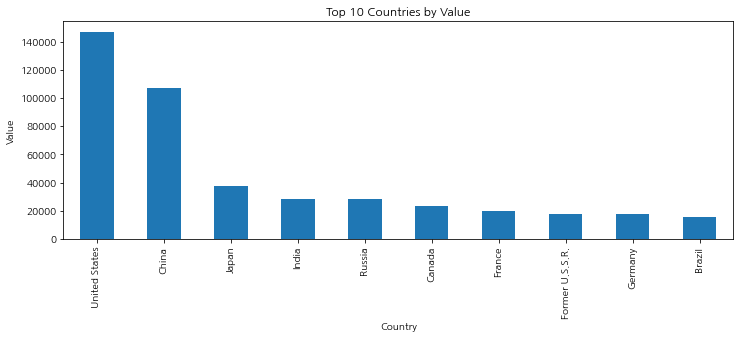

In [64]:
# 국가별 총 발전량 상위 10개 국가 world 제외

# 'World' 행 제외한 데이터 및 'Generation (billion kWh)' 행만 추출
filtered_data = df[(df['COUNTRY'] != 'World') & (df['GENERATION'] == 'Generation (billion kWh)')]

# 그룹화하여 Value 합계 계산 후 상위 10개 국가 추출
top_10_countries = filtered_data.groupby('COUNTRY')['Value'].sum().nlargest(10)

# 막대그래프로 시각화
plt.figure(figsize=(12,4))  # 그래프 크기 설정
top_10_countries.plot(kind='bar')  # bar 형태의 plot 생성

plt.title('Top 10 Countries by Value')   # 그래프 제목 설정
plt.xlabel('Country')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.show()   # 그래프 출력


In [65]:
df.loc[(df['COUNTRY']=='Former U.S.S.R.') & (df['GENERATION']=='Generation (billion kWh)')]

,COUNTRY,GENERATION,Year,Value
923,Former U.S.S.R.,Generation (billion kWh),1980,1294.003644
3913,Former U.S.S.R.,Generation (billion kWh),1981,1252.196392
6903,Former U.S.S.R.,Generation (billion kWh),1982,1367.782245
9893,Former U.S.S.R.,Generation (billion kWh),1983,1416.611743
12883,Former U.S.S.R.,Generation (billion kWh),1984,1492.097622
...,...,...,...,...
111553,Former U.S.S.R.,Generation (billion kWh),2017,0.000000
114543,Former U.S.S.R.,Generation (billion kWh),2018,0.000000
117533,Former U.S.S.R.,Generation (billion kWh),2019,0.000000
120523,Former U.S.S.R.,Generation (billion kWh),2020,0.000000


"Former U.S.S.R."는 "Former Union of Soviet Socialist Republics"  
이 연합은 1922년에 설립되어 15개의 공화국으로 구성  
  
당시 국가명(영문) 데이터셋 내 국가명(COUNTRY)  
러시아 소비에트 연방 공화국 (Russian SFSR) Russia  
우크라이나 소비에트 사회주의 공화국 (Ukrainian SSR) Ukraine  
벨로루시 소비에트 사회주의 공화국 (Byelorussian SSR) Belarus  
우즈베키스탄 소비에트 사회주의 공화국 (Uzbek SSR) Uzbekistan  
카자흐스탄 소비에트 사회주의 공화국 (Kazakh SSR) Kazakhstan  
조지아 소비에트 사회주의 공화국 (Georgian SSR) Georgia  
아제르바이잔 소비에트 사회주의 공화국 (Azerbaijan SSR) Azerbaijan  
리투아니아 소비에트 사회주의 공화국 (Lithuanian SSR) Lithuania  
몰도바 소비에트 사회주이스트공화국(Moldavian SSR) Moldova  
라트비아 소비에스터사사리스트공과학(Latvian SSR) Latvia  
키르기스소 비 에스터사사리스트공과학(Kirghiz SSR) Kyrgyzstan  
타지키스탄소 비 에스터사사리스트공과학(Tajik SSR) Tajikistan  
아르메니아소 비 에스터사사리스트공과학(Armenian SSr) Armenia  
투르크메니 스탄소 비 에 스터사립립공과 학(Turkmen SSr) Turkmenistan  
에 스토니아소 비 에 스터사립립공과 학(Estonia nSSR) Estonia  
  
U.S.S.R.는 1991년 12월 26일 해체되었습니다.

Former U.S.S.R의 데이터가 1991년까지 데이터밖에 없지만 총 에너지 발전량이 상위 10위 안에 해당하는 지표로서  
처리하기 위한 방안을 마련할 필요성이 있다.  
1. 1992년 부터 데이터의 합. 하지만 현재 독립된 국가들로서 이 방안은 절절하지 않은 것으로 보여짐
2. 1991년 이전의 데이터를 비율에 따라 분할. 비율은 이후 에너지 생산량을 근거로 실시  
    이 방안의 경우 추측에 의한 결측값 처리로 신뢰도가 떨어질 것이 우려됨  
3. Former U.S.S.R 데이터 활용하지 않는 방향
    이 방안 또한 유의미한 데이터 손실이 발생하므로 가급적이면 활용하는 방향을 지향함
4. 보다 복잡한 모델링 접근  
    각 나라별로 다른 가중치나 계수를 적용하는 등의 모델링 접근  
    하지만 이러한 접근 방식은 구현이 복잡하며 추가 정보(각 나라의 인구, GDP 등)가 필요

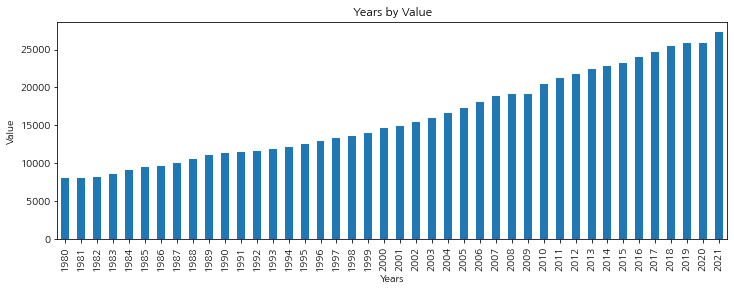

In [66]:
# 연도별 총 에너지 발전량

# 그룹화하여 Value 합계 계산 후 상위 10개 국가 추출
top_10_years = filtered_data.groupby('Year')['Value'].sum()


# 막대그래프로 시각화
plt.figure(figsize=(12,4))  # 그래프 크기 설정
top_10_years.plot(kind='bar')  # bar 형태의 plot 생성

plt.title('Years by Value')   # 그래프 제목 설정
plt.xlabel('Years')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.show()   #그래프 출력 


연도별 에너지 발전량은 지속적으로 성장하는 모습을 보이며 소모량과의 관계를 살펴보며 추가적인 분석이 필요할 것으로 요구됨

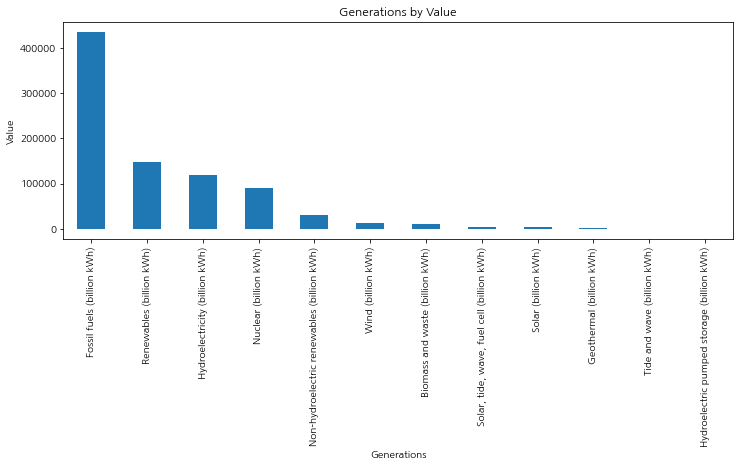

In [67]:
# 발전원별 발전량

# 'World' 행 제외한 데이터 및 'Generation (billion kWh)' 행만 추출
filtered_data_gen = df[(df['COUNTRY'] != 'World') & (df['GENERATION'] != "Generation (billion kWh)")]

# 그룹화하여 Value 합계 계산 후 상위 10개 국가 추출
top_10_generation = filtered_data_gen.groupby('GENERATION')['Value'].sum().sort_values(ascending=False)


# 막대그래프로 시각화
plt.figure(figsize=(12,4))  # 그래프 크기 설정
top_10_generation.plot(kind='bar')  # bar 형태의 plot 생성

plt.title('Generations by Value')   # 그래프 제목 설정
plt.xlabel('Generations')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.show()   #그래프 출력 


발전량 순위 상위 5개
1. Generation (billion kWh)  
2. Fossil fuels (billion kWh)
3. Renewables (billion kWh)
4. Hydroelectricity (billion kWh)
5. Nuclear (billion kWh)

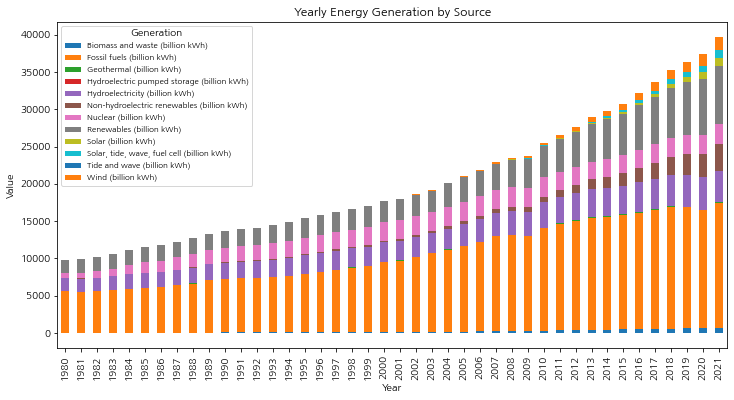

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 연도와 GENERATION으로 그룹화하고, Value의 합계를 계산합니다.
grouped_data = filtered_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()

# 누적 막대그래프를 생성합니다.
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Yearly Energy Generation by Source')   # 그래프 제목 설정
plt.xlabel('Year')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   #그래프 출력 


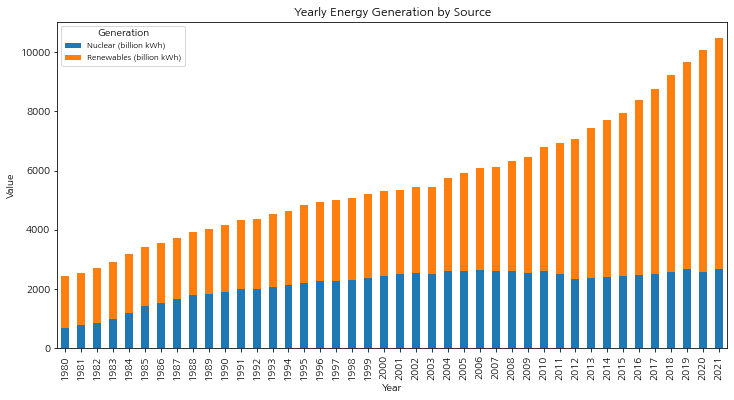

In [69]:
# 재생에너지 발전과 원자력 발전만 추출하여 시각화

select_data_gen = filtered_data_gen[(filtered_data_gen['GENERATION']=='Renewables (billion kWh)') | (filtered_data_gen['GENERATION']=='Nuclear (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()

# 누적 막대그래프를 생성합니다.
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Yearly Energy Generation by Source')   # 그래프 제목 설정
plt.xlabel('Year')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   #그래프 출력 


원자력 발전의 발전량에 비해서 재생에너지 발전량은 크게 증가하는 것을 확인 가능  
하지만 원자력 발전을 할 수 있는 국가는 한정되어 있으므로 추가적으로 국가를 선별하여 확인하는 절차가 요구됨

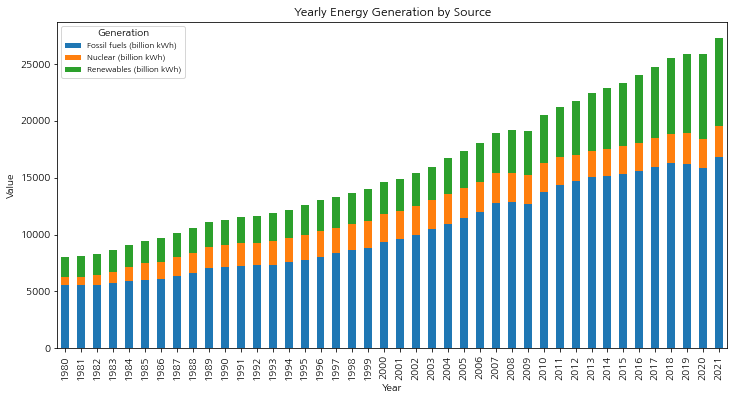

In [70]:
# 상위 카테고리로 묶여 있는 시각화 추가 

# dev = df[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]

# 재생에너지 발전과 원자력 발전만 추출하여 시각화

select_data_gen = filtered_data_gen[(filtered_data_gen['GENERATION']=='Renewables (billion kWh)') | (filtered_data_gen['GENERATION']=='Nuclear (billion kWh)')| (filtered_data_gen['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()

# 누적 막대그래프를 생성합니다.
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Yearly Energy Generation by Source')   # 그래프 제목 설정
plt.xlabel('Year')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   #그래프 출력 




In [71]:

china = df[df['COUNTRY'].values == 'China']

china.head()


,COUNTRY,GENERATION,Year,Value
533,China,Generation (billion kWh),1980,285.474
534,China,Nuclear (billion kWh),1980,0.000
535,China,Fossil fuels (billion kWh),1980,227.856
536,China,Renewables (billion kWh),1980,57.618
537,China,Hydroelectricity (billion kWh),1980,57.618


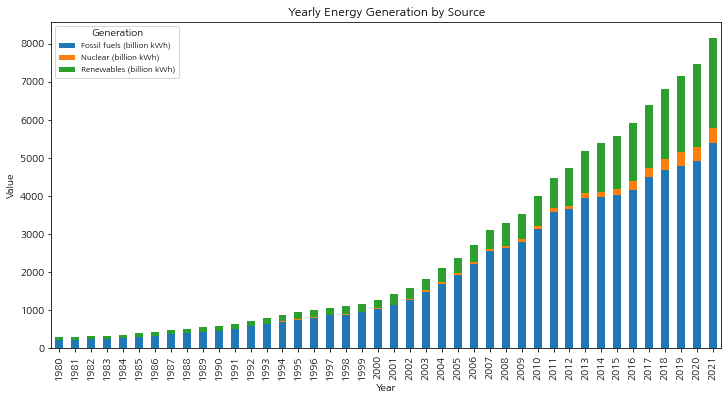

In [72]:
select_data_gen = china[(china['GENERATION']=='Renewables (billion kWh)') | (china['GENERATION']=='Nuclear (billion kWh)')| (china['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()

# 누적 막대그래프를 생성합니다.
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Yearly Energy Generation by Source')   # 그래프 제목 설정
plt.xlabel('Year')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   #그래프 출력 


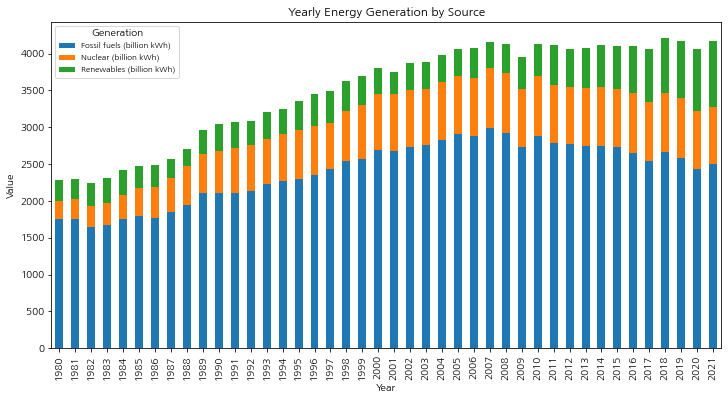

In [73]:

usa = df[df['COUNTRY'].values == 'United States']

usa.head()


select_data_gen = usa[(usa['GENERATION']=='Renewables (billion kWh)') | (usa['GENERATION']=='Nuclear (billion kWh)')| (usa['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()

# 누적 막대그래프를 생성합니다.
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Yearly Energy Generation by Source')   # 그래프 제목 설정
plt.xlabel('Year')   # x축 레이블 설정 
plt.ylabel('Value')     # y축 레이블 설정 

plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   #그래프 출력 


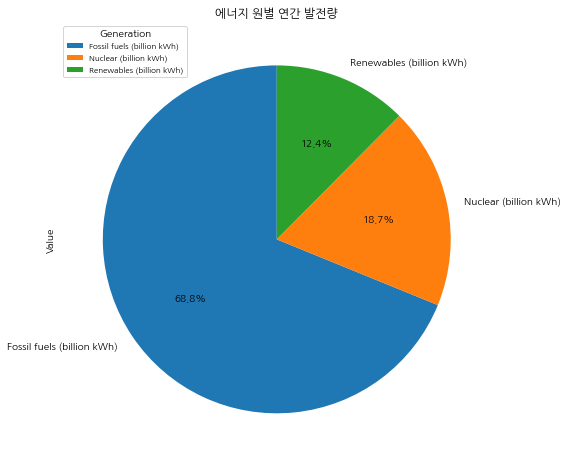

In [74]:
import matplotlib.pyplot as plt

# ... (your previous code)

usa = df[df['COUNTRY'].values == 'United States']

usa.head()


select_data_gen = usa[(usa['GENERATION']=='Renewables (billion kWh)') | (usa['GENERATION']=='Nuclear (billion kWh)')| (usa['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()


import matplotlib.pyplot as plt

# ... (이전 코드)

# 데이터를 'GENERATION' 기준으로 합산
total_generation = select_data_gen.groupby('GENERATION')['Value'].sum()

# 원형 그래프 생성
total_generation.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('에너지 원별 연간 발전량')   # 그래프 제목 설정
plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   # 그래프 출력



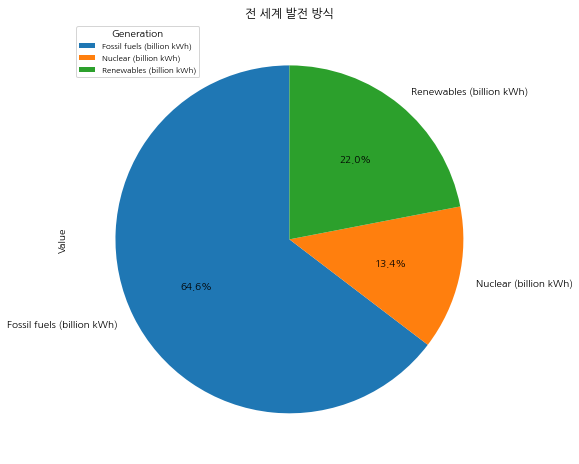

In [76]:
import matplotlib.pyplot as plt

# ... (your previous code)

usa = df[df['COUNTRY'].values == 'World']

usa.head()


select_data_gen = usa[(usa['GENERATION']=='Renewables (billion kWh)') | (usa['GENERATION']=='Nuclear (billion kWh)')| (usa['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()


import matplotlib.pyplot as plt

# ... (이전 코드)

# 데이터를 'GENERATION' 기준으로 합산
total_generation = select_data_gen.groupby('GENERATION')['Value'].sum()

# 원형 그래프 생성
total_generation.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('전 세계 발전 방식')   # 그래프 제목 설정
plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   # 그래프 출력



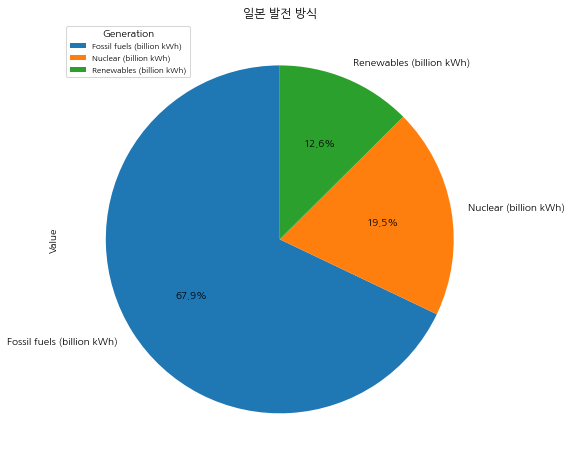

In [83]:
import matplotlib.pyplot as plt

# ... (your previous code)

usa = df[df['COUNTRY'].values == 'Japan']

usa.head()


select_data_gen = usa[(usa['GENERATION']=='Renewables (billion kWh)') | (usa['GENERATION']=='Nuclear (billion kWh)')| (usa['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()



# 데이터를 'GENERATION' 기준으로 합산
total_generation = select_data_gen.groupby('GENERATION')['Value'].sum()

# 원형 그래프 생성
total_generation.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('일본 발전 방식')   # 그래프 제목 설정
plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   # 그래프 출력



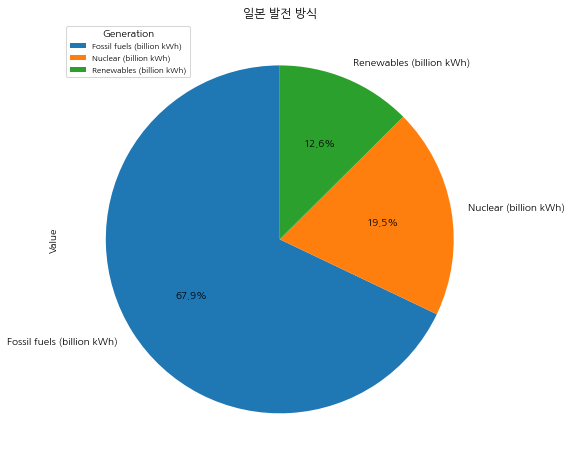

In [85]:
# 'World' 행 제외한 데이터 및 'Generation (billion kWh)' 행만 추출
filtered_data = df[(df['COUNTRY'] != 'World') & (df['GENERATION'] == 'Renewables (billion kWh)')]

# 그룹화하여 Value 합계 계산 후 상위 10개 국가 추출
top_10_countries = filtered_data.groupby('COUNTRY')['Value'].sum().nlargest(10)

# 데이터를 'GENERATION' 기준으로 합산
total_generation = select_data_gen.groupby('GENERATION')['Value'].sum()

# 원형 그래프 생성
total_generation.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('일본 발전 방식')   # 그래프 제목 설정
plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   # 그래프 출력

In [86]:
top_10_countries # 재생 애너지 상위

COUNTRY
China            24519.626559
United States    18294.620191
Canada           14765.189462
Brazil           13265.868513
Russia            5306.071614
India             5077.868542
Norway            5057.450868
Japan             4735.967482
Sweden            3253.387695
Germany           3224.827750
Name: Value, dtype: float64

In [89]:
# 'World' 행 제외한 데이터 및 'Generation (billion kWh)' 행만 추출
filtered_data = df[(df['COUNTRY'] != 'World') & (df['GENERATION'] == 'Nuclear (billion kWh)')]

# 그룹화하여 Value 합계 계산 후 상위 10개 국가 추출
top_10_countries = filtered_data.groupby('COUNTRY')['Value'].sum().nlargest(10)

top_10_countries

COUNTRY
United States     27555.634195
France            14160.746427
Japan              7368.341525
Russia             4417.494320
Germany            3886.832296
South Korea        3857.696562
Canada             3303.136745
China              3071.521000
United Kingdom     2711.022918
Sweden             2514.639807
Name: Value, dtype: float64

In [90]:
# 'World' 행 제외한 데이터 및 'Generation (billion kWh)' 행만 추출
filtered_data = df[(df['COUNTRY'] != 'World') & (df['GENERATION'] == 'Fossil fuels (billion kWh)')]

# 그룹화하여 Value 합계 계산 후 상위 10개 국가 추출
top_10_countries = filtered_data.groupby('COUNTRY')['Value'].sum().nlargest(10)

top_10_countries

COUNTRY
United States      101260.853927
China               79812.146423
Japan               25625.961203
India               22805.727068
Russia              18332.971880
Former U.S.S.R.     13654.144000
Germany             10337.412242
United Kingdom       9437.066692
South Korea          8023.386113
South Africa         7505.240980
Name: Value, dtype: float64

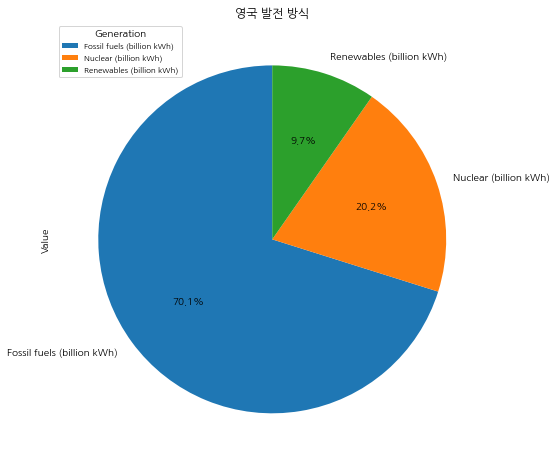

In [91]:
import matplotlib.pyplot as plt

# ... (your previous code)

usa = df[df['COUNTRY'].values == 'United Kingdom']

usa.head()


select_data_gen = usa[(usa['GENERATION']=='Renewables (billion kWh)') | (usa['GENERATION']=='Nuclear (billion kWh)')| (usa['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()



# 데이터를 'GENERATION' 기준으로 합산
total_generation = select_data_gen.groupby('GENERATION')['Value'].sum()

# 원형 그래프 생성
total_generation.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('영국 발전 방식')   # 그래프 제목 설정
plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   # 그래프 출력



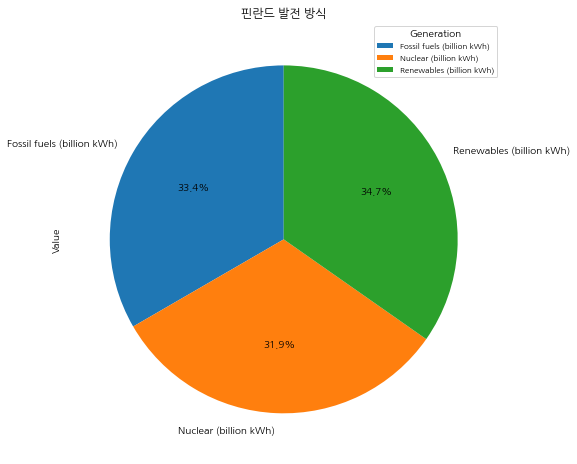

In [119]:
import matplotlib.pyplot as plt

# ... (your previous code)

usa = df[df['COUNTRY'].values == 'Finland']

usa.head()


select_data_gen = usa[(usa['GENERATION']=='Renewables (billion kWh)') | (usa['GENERATION']=='Nuclear (billion kWh)')| (usa['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()



# 데이터를 'GENERATION' 기준으로 합산
total_generation = select_data_gen.groupby('GENERATION')['Value'].sum()

# 원형 그래프 생성
total_generation.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('핀란드 발전 방식')   # 그래프 제목 설정
plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   # 그래프 출력



In [ ]:
import matplotlib.pyplot as plt

# ... (your previous code)

usa = df[df['COUNTRY'].values == 'Finland']

usa.head()


select_data_gen = usa[(usa['GENERATION']=='Renewables (billion kWh)') | (usa['GENERATION']=='Nuclear (billion kWh)')| (usa['GENERATION']=='Fossil fuels (billion kWh)')]
grouped_data = select_data_gen.groupby(['Year', 'GENERATION'])['Value'].sum().unstack()



# 데이터를 'GENERATION' 기준으로 합산
total_generation = select_data_gen.groupby('GENERATION')['Value'].sum()

# 원형 그래프 생성
total_generation.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))

plt.title('핀란드 발전 방식')   # 그래프 제목 설정
plt.legend(title='Generation', prop={'size': 8})  # 범례 추가 및 사이즈 조절

plt.show()   # 그래프 출력

